In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/combined_results_social1_story5_1.csv')

In [3]:
# Group by 'sequence' and 'Trial', then find the maximum 'timestep' for each group
max_timesteps = df.groupby(['sequence', 'Trial'])['timestep'].max().reset_index()

# Renaming the column for clarity
max_timesteps = max_timesteps.rename(columns={'timestep': 'total_time'})

# Display the result
print(max_timesteps)

               sequence  Trial  total_time
0       [0, 1, 2, 3, 4]      0           4
1       [0, 1, 2, 3, 4]      1           4
2       [0, 1, 2, 3, 4]      2           4
3       [0, 1, 2, 3, 4]      3           4
4       [0, 1, 2, 3, 4]      4           4
...                 ...    ...         ...
119995  [4, 3, 2, 1, 0]    995          10
119996  [4, 3, 2, 1, 0]    996           7
119997  [4, 3, 2, 1, 0]    997           4
119998  [4, 3, 2, 1, 0]    998           5
119999  [4, 3, 2, 1, 0]    999           9

[120000 rows x 3 columns]


In [4]:
# Pivot the table to get frequencies
pivot_df = max_timesteps.pivot_table(index='sequence', columns='total_time', aggfunc='size', fill_value=0)

# Display the result
print(pivot_df)

total_time        4    5    6    7   8   9   10  11  12  13  ...  27  28  29  \
sequence                                                     ...               
[0, 1, 2, 3, 4]  388  152  111   90  77  45  57  19  16  10  ...   0   0   0   
[0, 1, 2, 4, 3]  362  146  103   94  94  45  44  28  22  18  ...   0   0   0   
[0, 1, 3, 2, 4]  333  162  122  110  67  71  35  25  21  10  ...   0   0   0   
[0, 1, 3, 4, 2]  337  163  118   98  77  55  41  29  21  11  ...   0   0   0   
[0, 1, 4, 2, 3]  291  189  132  112  82  53  41  24  14  13  ...   0   0   0   
...              ...  ...  ...  ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..   
[4, 3, 0, 2, 1]  296  194  149  107  64  57  29  28  16  20  ...   0   0   0   
[4, 3, 1, 0, 2]  276  174  145  113  68  70  43  29  21  17  ...   0   0   0   
[4, 3, 1, 2, 0]  285  180  172  102  80  53  44  35  16   6  ...   0   0   0   
[4, 3, 2, 0, 1]  300  191  144  102  78  51  45  24  15  12  ...   0   0   0   
[4, 3, 2, 1, 0]  256  210  165   99  80 

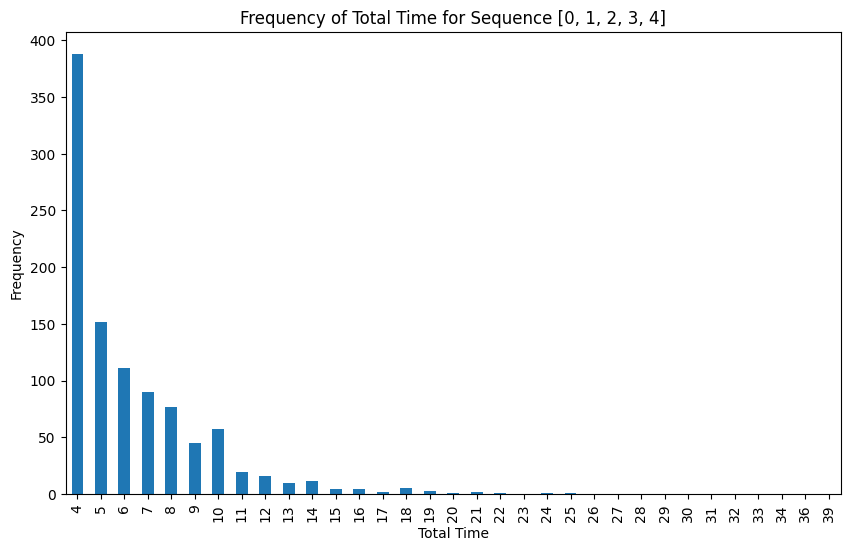

In [5]:
# Select the first row (for the sequence [0, 1, 2, 3, 4])
sequence_data = pivot_df.iloc[0]

# Plotting
plt.figure(figsize=(10, 6))
sequence_data.plot(kind='bar')
plt.title('Frequency of Total Time for Sequence [0, 1, 2, 3, 4]')
plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.show()


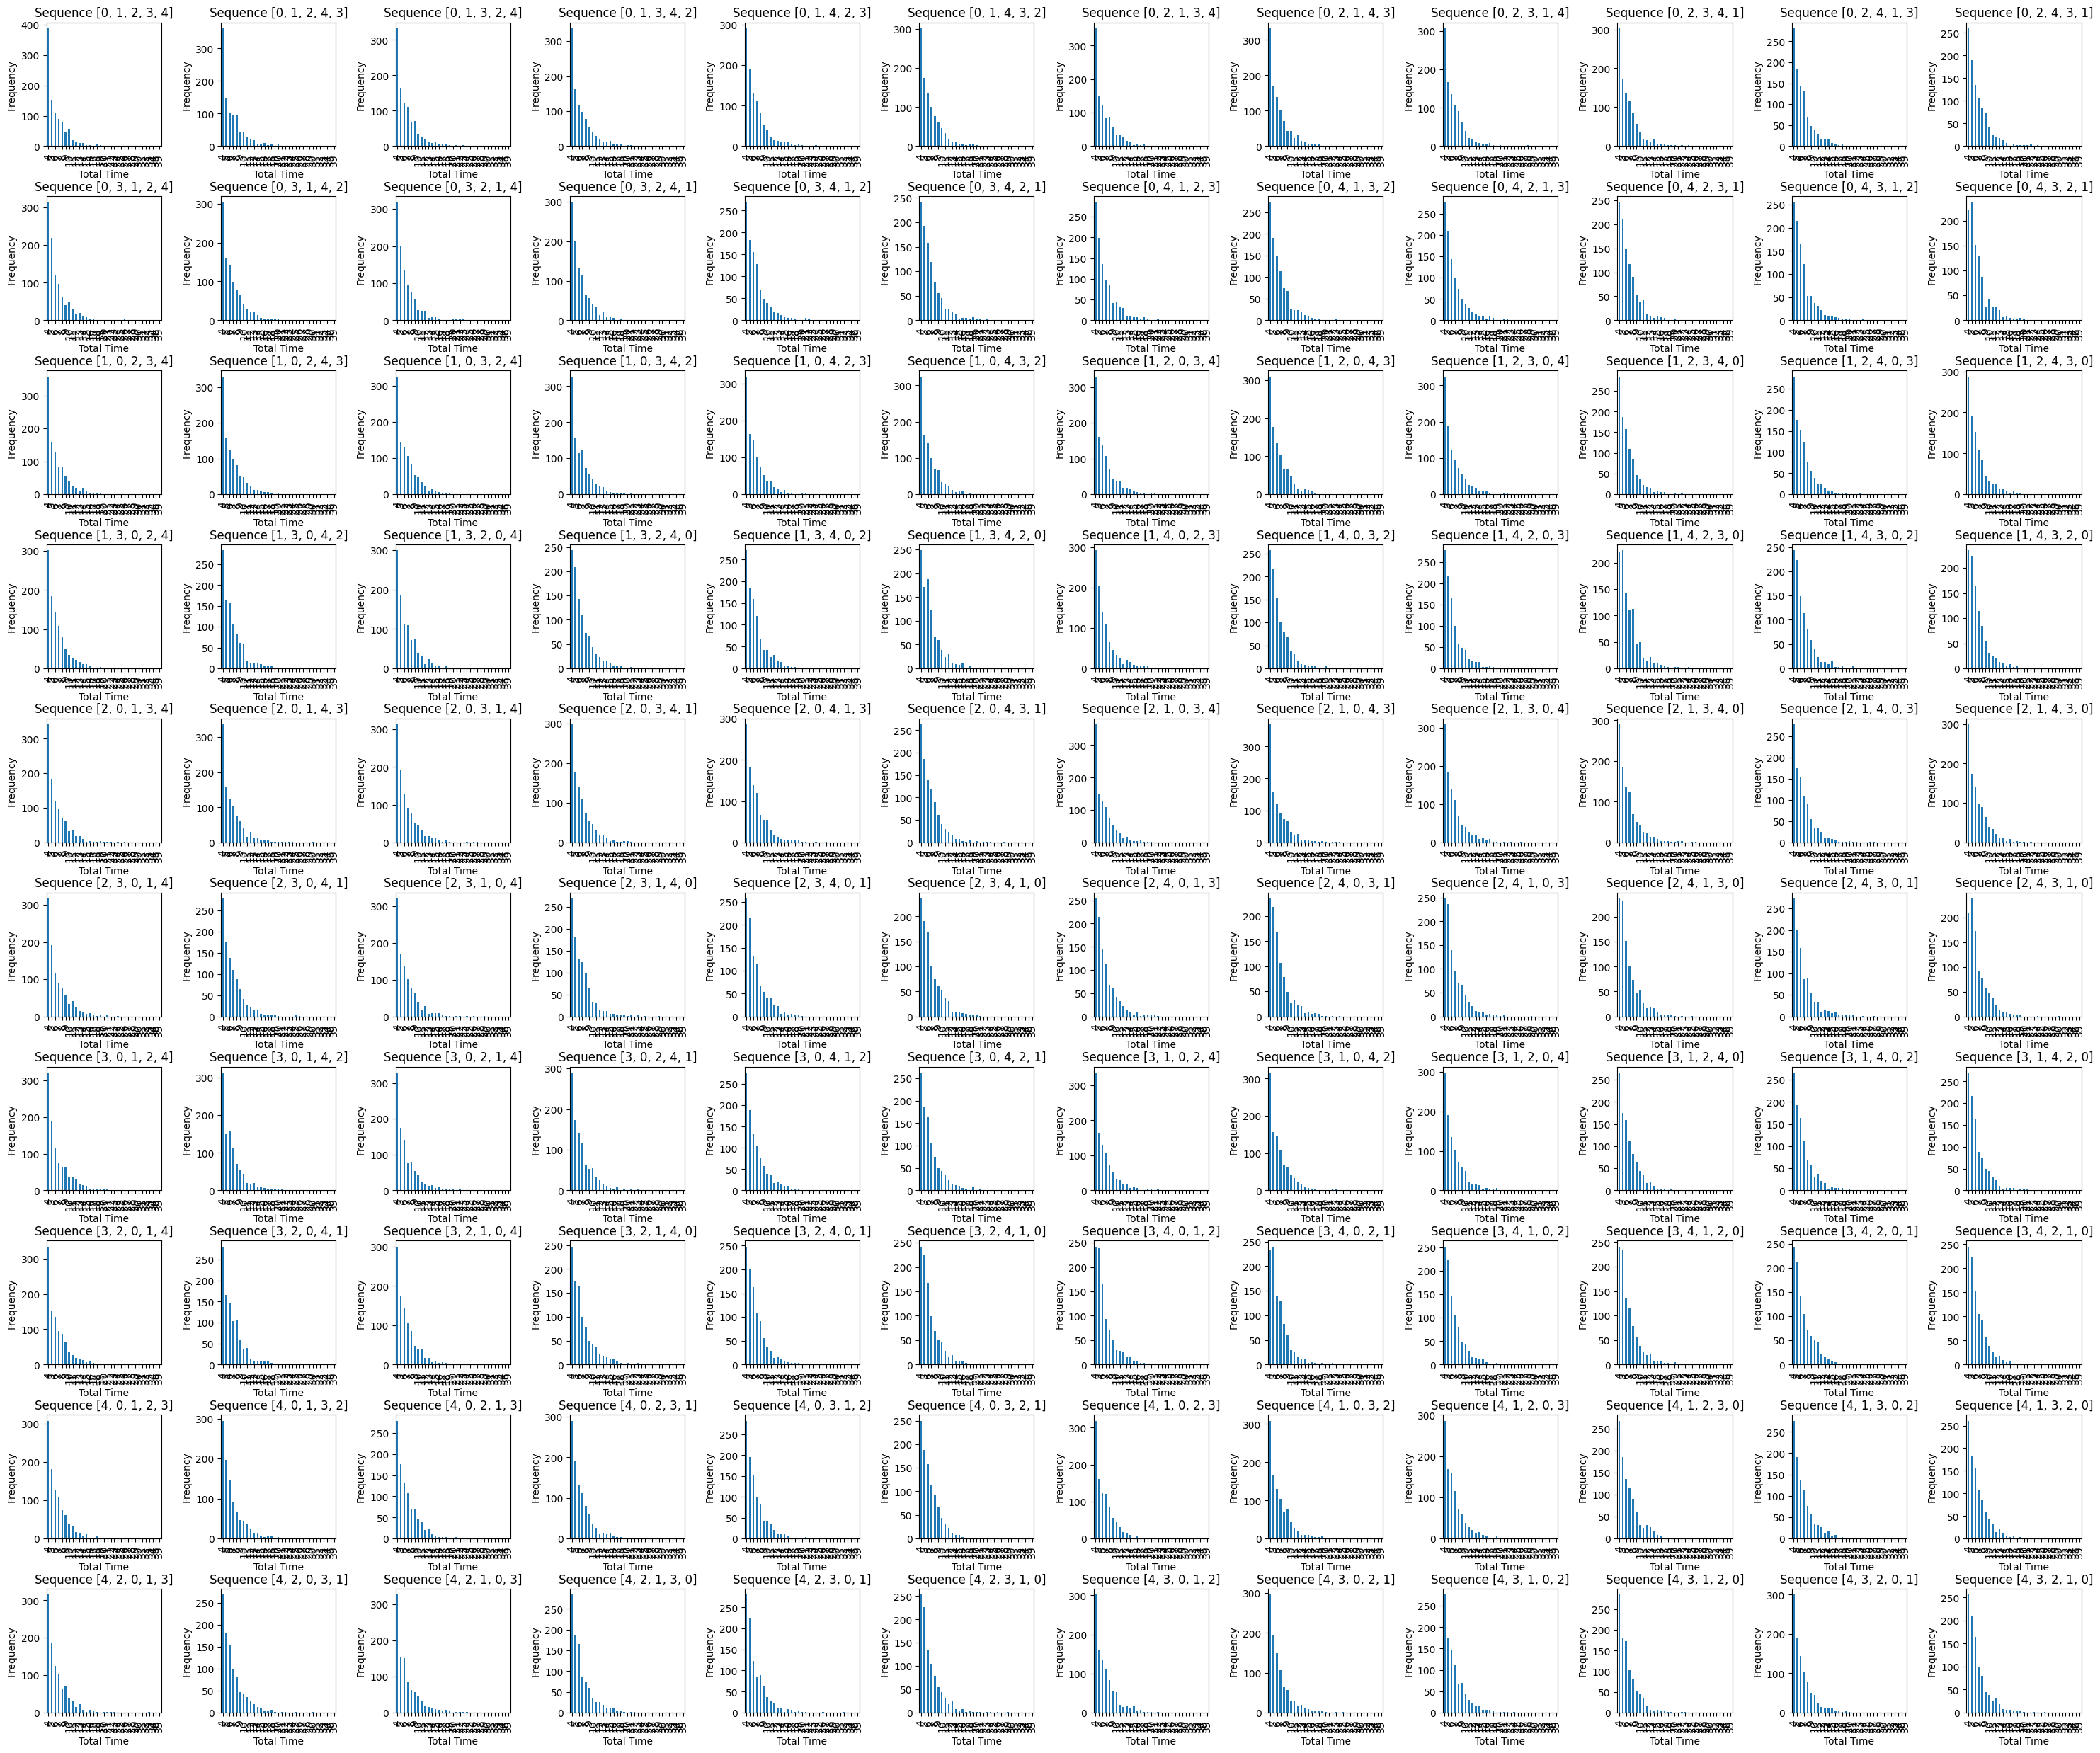

In [6]:
# Create a 10x12 grid of plots
fig, axes = plt.subplots(nrows=10, ncols=12, figsize=(30, 25))
fig.tight_layout(pad=3.0)

# Iterate over each sequence and plot its data
for i, (sequence, data) in enumerate(pivot_df.iterrows()):
    # Find the subplot row and column
    row, col = i // 12, i % 12

    # Plot the data
    data.plot(kind='bar', ax=axes[row, col])
    
    # Set subplot title
    axes[row, col].set_title(f'Sequence {sequence}')
    
    # Set x and y labels
    axes[row, col].set_xlabel('Total Time')
    axes[row, col].set_ylabel('Frequency')

# Show the plot
plt.show()


In [20]:
# Calculating the average and variance of 'total_time' for each 'sequence'
stats = max_timesteps.groupby('sequence')['total_time'].agg(['mean', 'var']).reset_index()

# Renaming the columns for clarity
stats = stats.rename(columns={'mean': 'average_total_time', 'var': 'variance_total_time'})

# Display the result
print(stats)

            sequence  average_total_time  variance_total_time
0    [0, 1, 2, 3, 4]               6.322             9.349666
1    [0, 1, 2, 4, 3]               6.629            11.460820
2    [0, 1, 3, 2, 4]               6.566            10.131776
3    [0, 1, 3, 4, 2]               6.604            10.259443
4    [0, 1, 4, 2, 3]               6.645            10.139114
..               ...                 ...                  ...
115  [4, 3, 0, 2, 1]               6.524             9.214639
116  [4, 3, 1, 0, 2]               6.739             9.484363
117  [4, 3, 1, 2, 0]               6.447             7.694886
118  [4, 3, 2, 0, 1]               6.467             8.277188
119  [4, 3, 2, 1, 0]               6.624             9.149774

[120 rows x 3 columns]


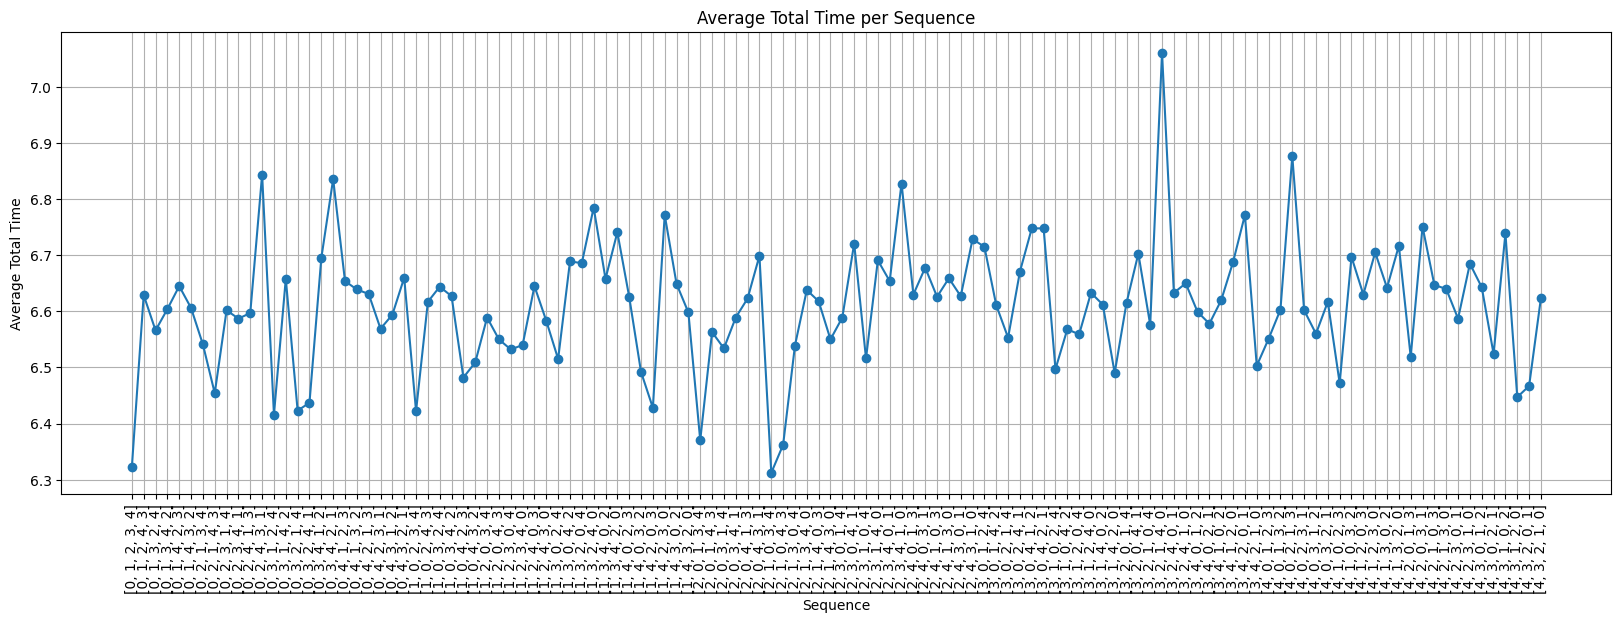

In [8]:
#Plotting average of total time per sequence
plt.figure(figsize=(20, 6))
plt.plot(stats['sequence'], stats['average_total_time'], marker='o')
plt.title('Average Total Time per Sequence')
plt.xlabel('Sequence')
plt.ylabel('Average Total Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

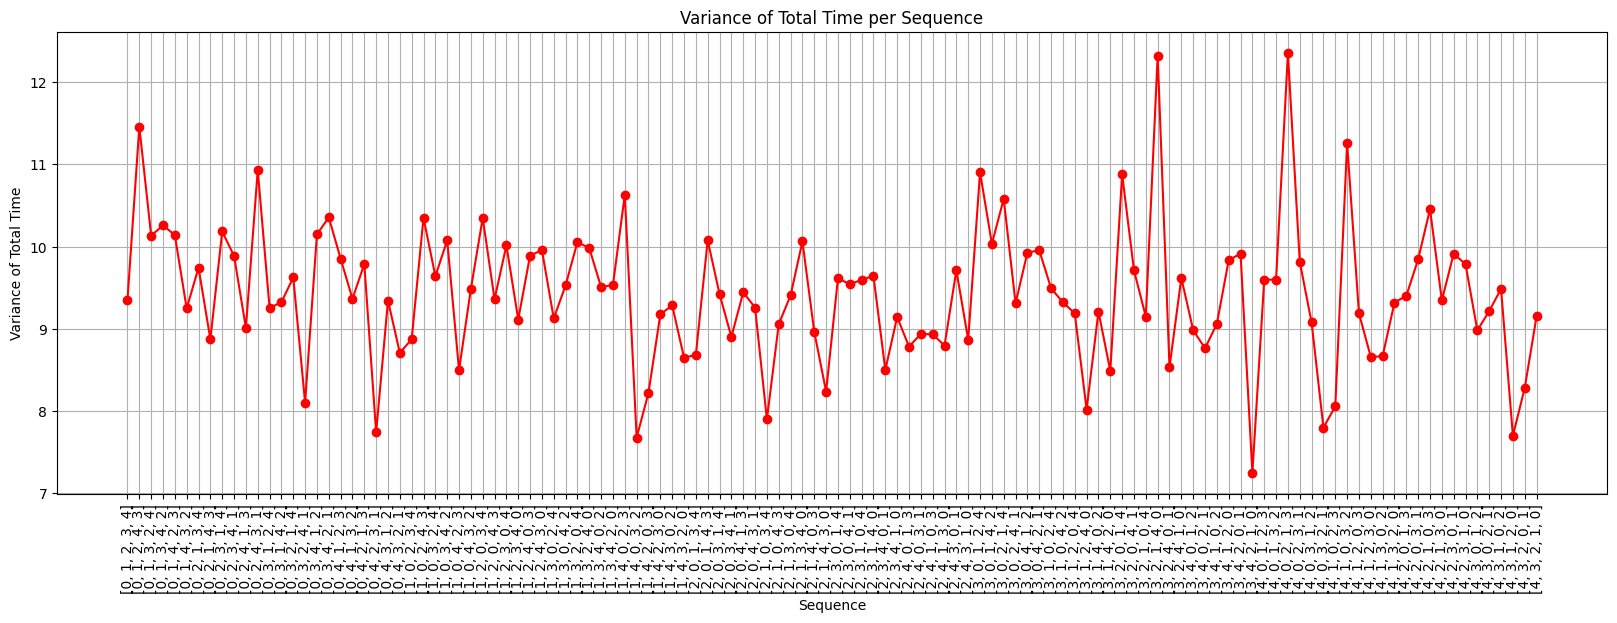

In [9]:
# Plotting variance of total time per sequence
plt.figure(figsize=(20, 6))
plt.plot(stats['sequence'], stats['variance_total_time'], marker='o', color='red')
plt.title('Variance of Total Time per Sequence')
plt.xlabel('Sequence')
plt.ylabel('Variance of Total Time')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.grid(True)
plt.show()